The National Basketball Association is the premier professional basketball league in the world. Historically, it has almost exclusively been filled with American players. However, there has been a trend of more and more international players entering the NBA ranks. This has especially been the case since about 2000. There are some thoughts that international players have a distinct playing style from their American counterparts. This project aims to look at game stats and how they vary depending on a player's nationality. Significant trends could help inform future team-building and training and development programs in America and other countries. 

In [62]:
#Load packages

from scipy.stats import norm
from scipy.stats import t
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import seed
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('fivethirtyeight')

In [63]:
#import NBA dataset from Kaggle : https://www.kaggle.com/datasets/justinas/nba-players-data/data

df = pd.read_csv('all_seasons.csv')

In [64]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [65]:
#Dataset covers years from 1996 to 2022

df['draft_year'].unique()

array(['1996', '1994', '1993', '1989', '1995', '1985', '1988', '1991',
       '1986', '1990', '1984', '1987', '1982', '1992', 'Undrafted',
       '1983', '1981', '1978', '1979', '1980', '1976', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '1963', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'], dtype=object)

In [66]:
non_us = df[df['country'] != 'USA']
year_group = non_us.groupby('season')['player_name'].agg('count')
year_group.index = year_group.index.str.strip().str[-2:]

/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_84412/3861926318.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  yr.set_xticklabels(yr.get_xticklabels(), rotation=70)


Text(0.5, 1.0, '# of non-USA NBA players by season')

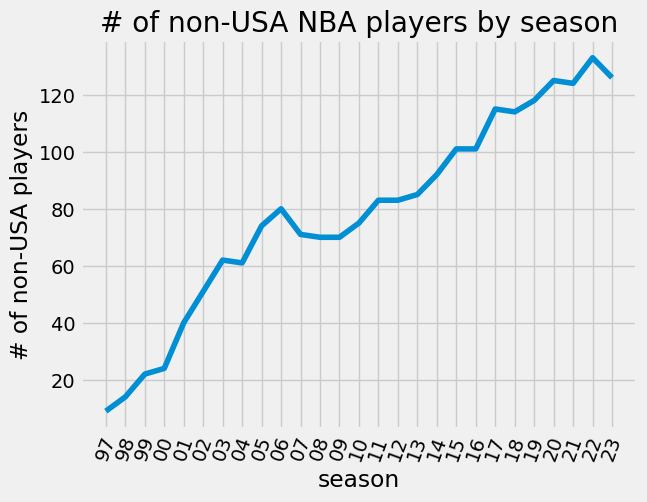

In [67]:
#Create plot to show # of non-USA players in NBA over the years

a4_dims = (100.7, 30.27)
yr = sns.lineplot(year_group)
yr.set_xticklabels(yr.get_xticklabels(), rotation=70)
plt.ylabel('# of non-USA players')
plt.title('# of non-USA NBA players by season')


#Chart shows an increasing trend in non-USA players in NBA from 1996-2023 supporting the initial hypothesis

In [68]:
#Look at most common countries; vast majority are USA but we will primarily look at the top 5 countries
countries = dict(df['country'].value_counts())
countries

{'USA': 10721,
 'Canada': 205,
 'France': 190,
 'Australia': 100,
 'Spain': 93,
 'Brazil': 86,
 'Turkey': 76,
 'Slovenia': 76,
 'Croatia': 72,
 'Serbia': 70,
 'Argentina': 67,
 'Germany': 66,
 'Lithuania': 65,
 'Ukraine': 45,
 'Nigeria': 43,
 'Italy': 42,
 'Senegal': 42,
 'Russia': 37,
 'Montenegro': 35,
 'Dominican Republic': 35,
 'Georgia': 34,
 'Serbia and Montenegro': 33,
 'Greece': 32,
 'Democratic Republic of the Congo': 31,
 'Puerto Rico': 30,
 'Latvia': 30,
 'Cameroon': 27,
 'United Kingdom': 24,
 'Switzerland': 23,
 'New Zealand': 21,
 'US Virgin Islands': 19,
 'Netherlands': 19,
 'Mexico': 18,
 'China': 18,
 'Poland': 18,
 'Haiti': 17,
 'Israel': 15,
 'Czech Republic': 15,
 'Jamaica': 15,
 'Congo': 15,
 'Bahamas': 14,
 'Sweden': 12,
 'St. Vincent & Grenadines': 12,
 'U.S. Virgin Islands': 12,
 'Yugoslavia': 11,
 'Japan': 11,
 'South Sudan': 10,
 'Bosnia and Herzegovina': 9,
 'England': 9,
 'Venezuela': 9,
 'Finland': 8,
 'DRC': 7,
 'Mali': 7,
 'Bosnia': 7,
 'Belize': 7,
 'Aus

/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_84412/1870327221.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _ = sns.heatmap(df.corr(),annot= True)


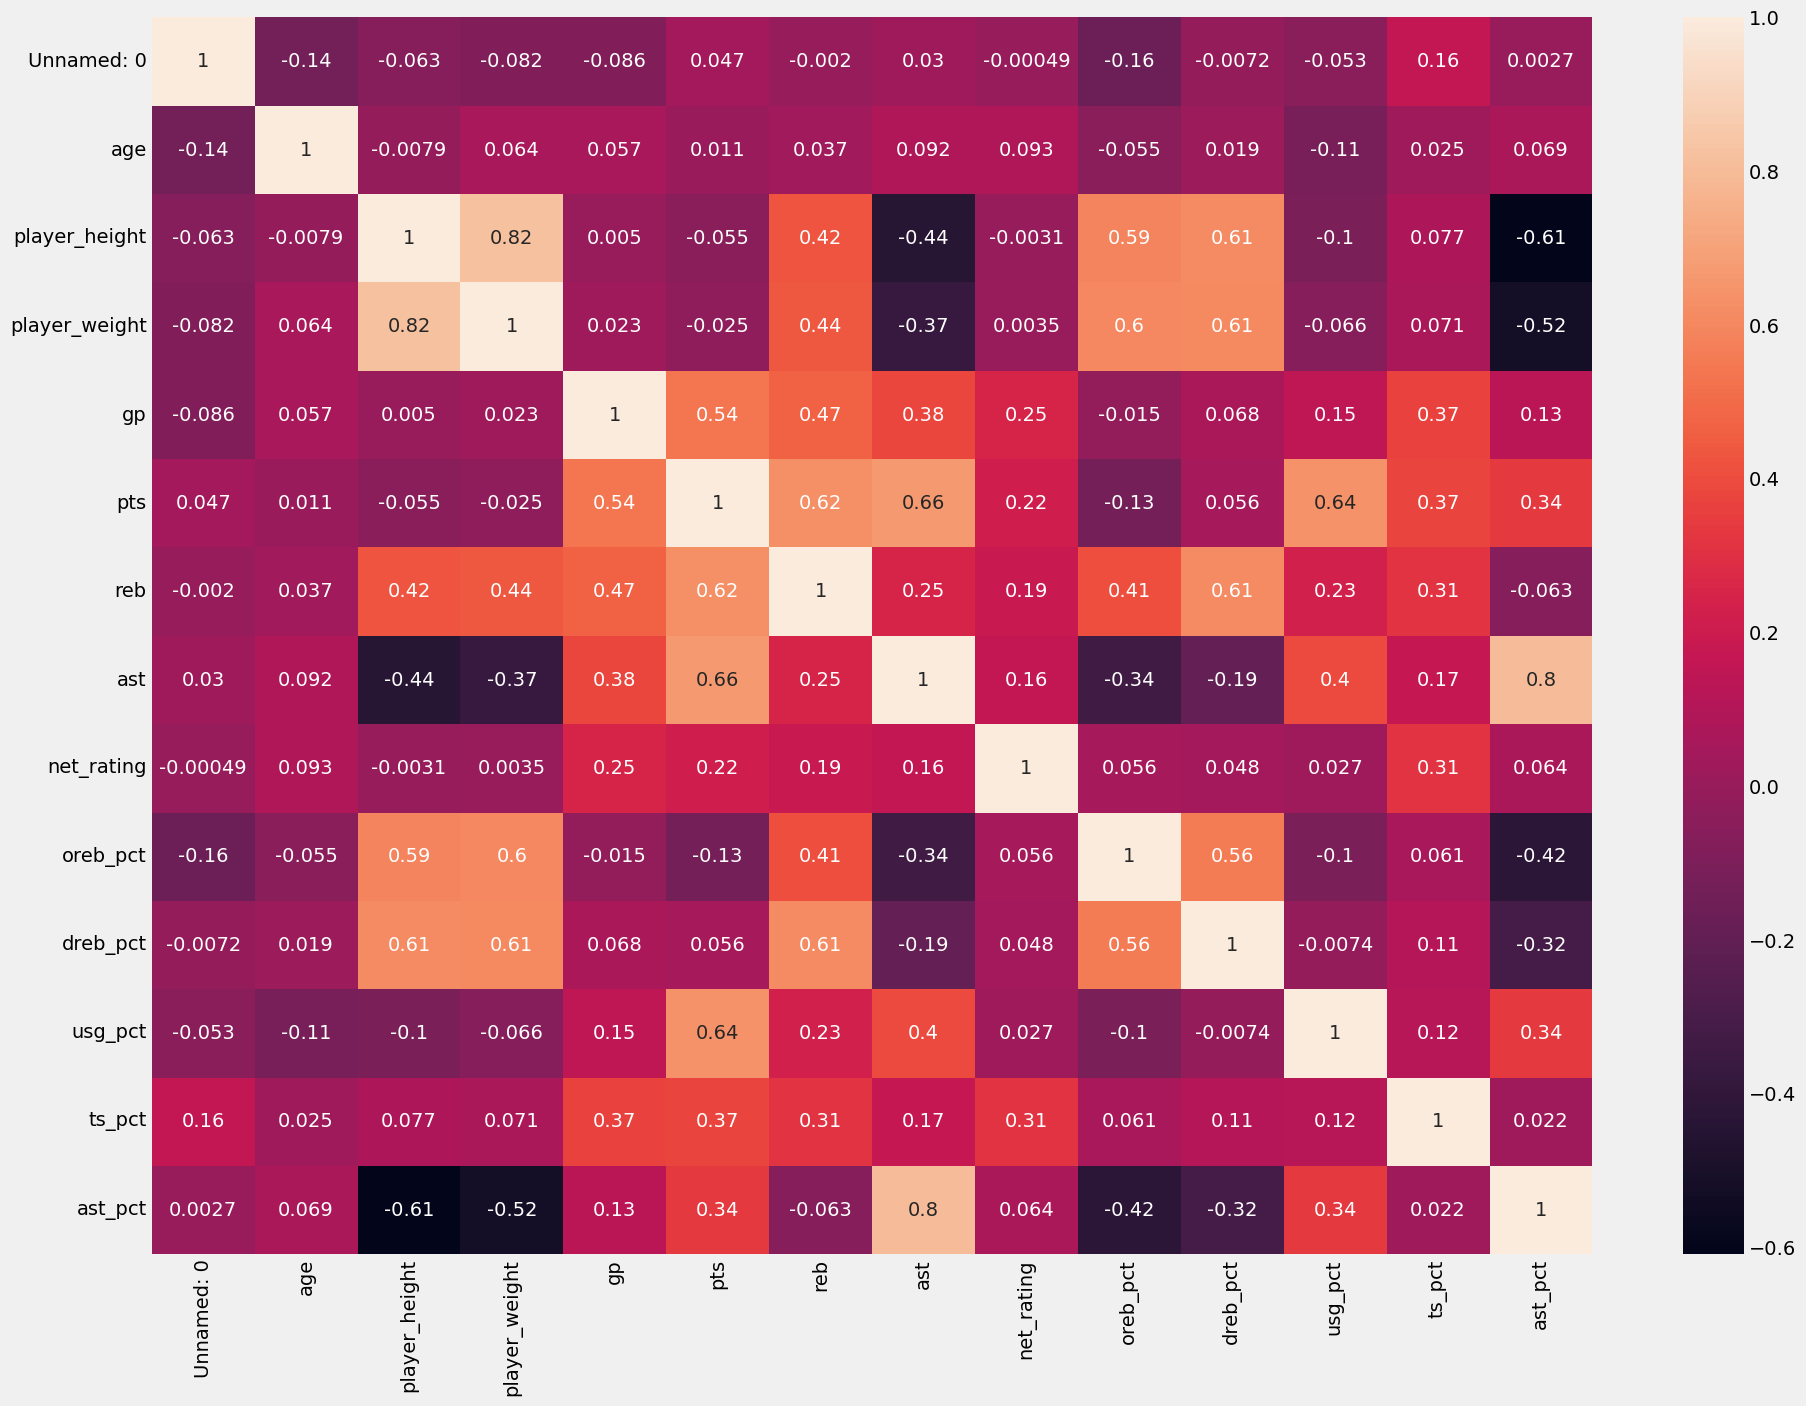

In [69]:
#Create a heatmap showing correlations of features

a4_dims = (20.7, 15.27)
fig, ax = plt.subplots(figsize=a4_dims)

_ = sns.heatmap(df.corr(),annot= True)


#Notably, as expected, shorter and lighter players are correlated with higher assists. Smaller players tend to be
#guards who distribute the ball more and get more assists in general. Conversely, there is a strong correlation
#between height and rebounding categories since taller players usually have the role of rebounding the basketball

In [70]:
#Group by country and filter for top 5 countries
country_group = df.groupby('country').filter(lambda x: len(x) > 90)
country_group.country.unique()

array(['USA', 'Canada', 'France', 'Spain', 'Australia'], dtype=object)

Text(0.5, 1.0, 'player weight vs. height')

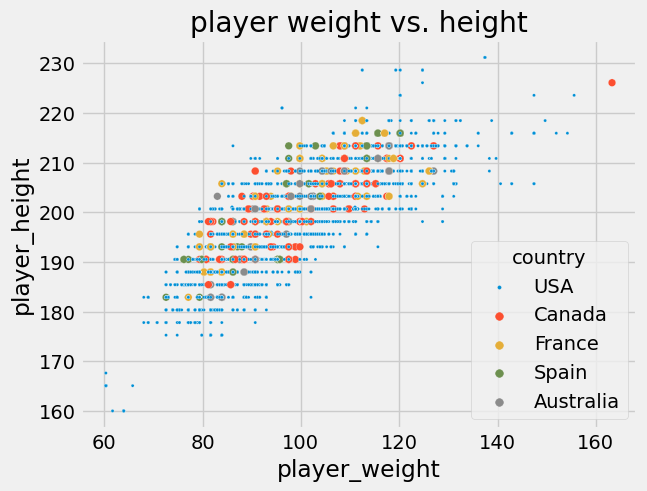

In [71]:
#Create a plot comparing player weights vs height and country info

_ = sns.scatterplot(x ='player_weight',y='player_height',data = country_group,hue = 'country', size = 'country',
                    sizes = {'USA': 5,
                            'Canada': 30,
                            'France': 30,
                            'Spain':30,
                            'Australia':30})
                            
plt.title('player weight vs. height')

#No clear pattern seen from this visual about countries

In [72]:
country_heights = {}
country_weights = {}
country_ast_pct = {}


for c in country_group['country'].unique():
    h = country_group[country_group['country'] == c]['player_height'] 
    w = country_group[country_group['country'] == c]['player_weight']
    a = country_group[country_group['country'] == c]['ast_pct']
    country_heights[c] = h
    country_weights[c] = w
    country_ast_pct[c] = a
    
df_heights = pd.DataFrame(country_heights)
df_weights = pd.DataFrame(country_weights)
df_ast_pct = pd.DataFrame(country_ast_pct)

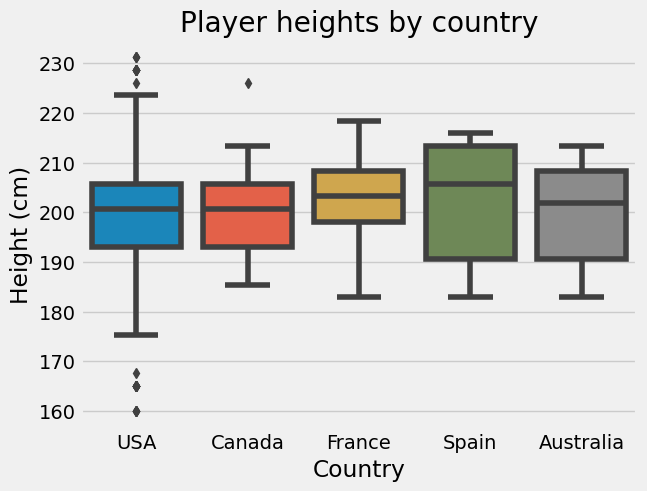

In [73]:
#Create boxplot of player heights by country

_ = sns.boxplot(data = df_heights)
_ = plt.xlabel('Country')
_ = plt.ylabel ('Height (cm)')
_ = plt.title('Player heights by country')

#Overall similar heights for different countries; possibly slightly higher for Spanish players
#as seen by higher median

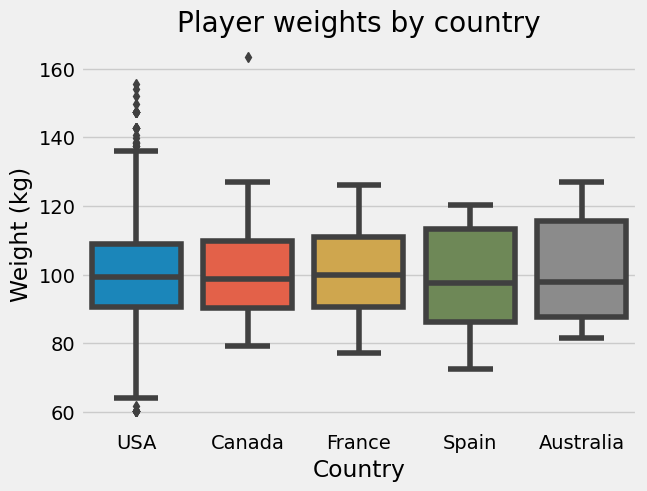

In [74]:
#Create boxplot of player weights by country

_ = sns.boxplot(data = df_weights)
_ = plt.xlabel('Country')
_ = plt.ylabel ('Weight (kg)')
_ = plt.title('Player weights by country')

#Overall similar weights for different countries

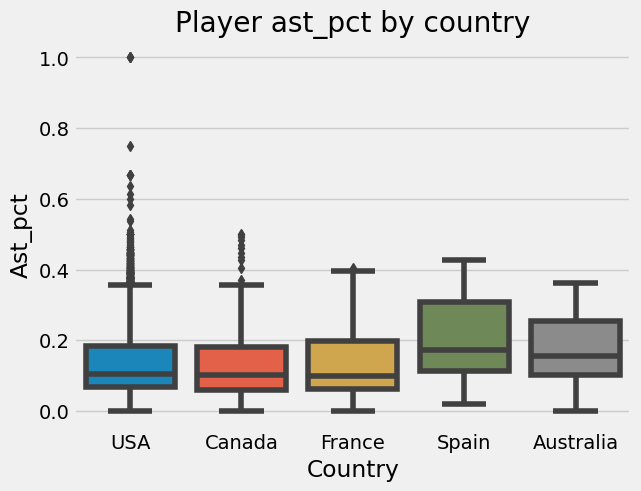

In [75]:
#Create boxplot of player weights by country

_ = sns.boxplot(data = df_ast_pct)
_ = plt.xlabel('Country')
_ = plt.ylabel ('Ast_pct')
_ = plt.title('Player ast_pct by country')

#Spanish players appear to have higher assist percentages. Anecdotally, many Spanish players are known for being 
# very good passers/distributors in line with this graphic 

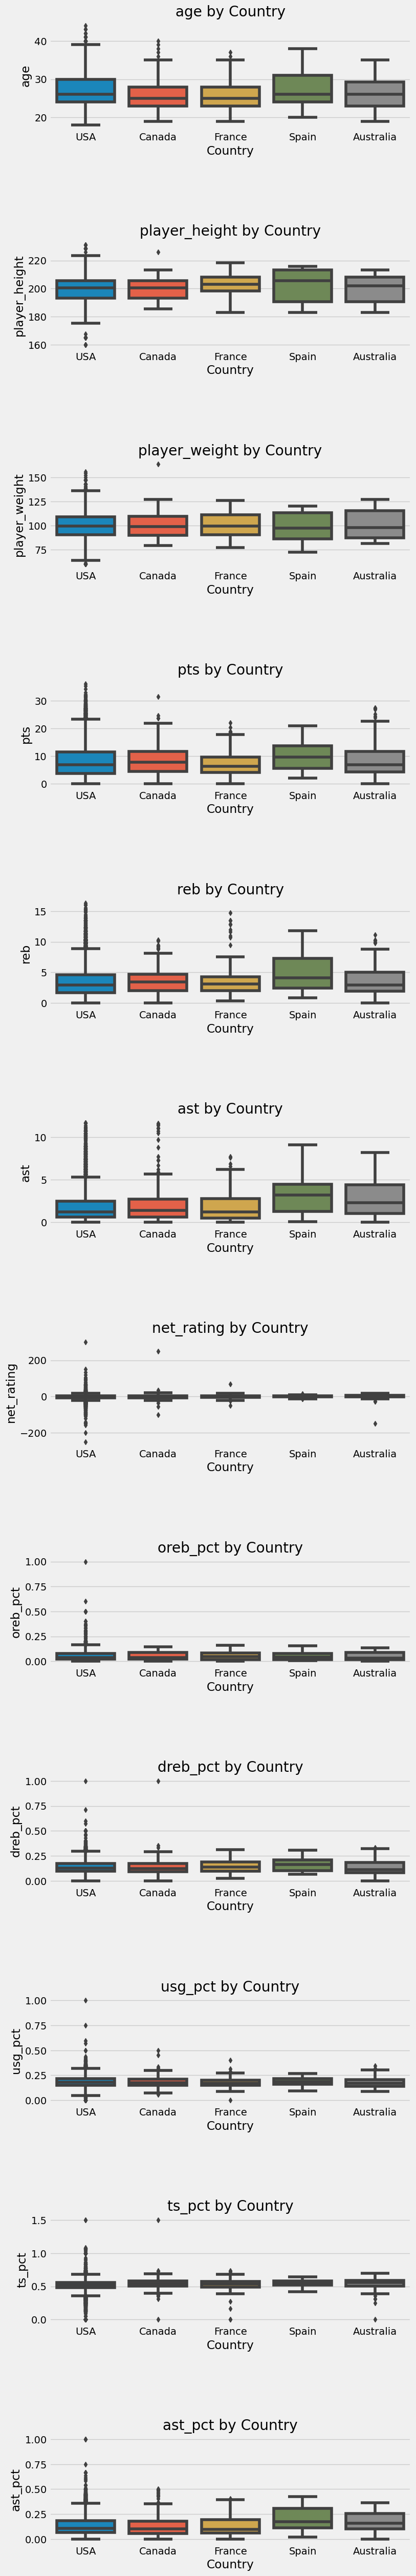

In [76]:
#Create plots comparing different statistics/attributes by top 5 countries

fig,ax = plt.subplots(12,1, figsize= (8,50))
plt.tight_layout()
plt.subplots_adjust(hspace = 1)

num_cols = country_group.select_dtypes('float64').columns
num_cols = list(num_cols)

for col in num_cols:

    i = num_cols.index(col)
    x = country_group['country']
    y = country_group[col]

    
    _ = sns.boxplot(x = x, y = y, data = country_group, ax = ax[i])
    _ =ax[i].set_title(f"{col}" ' by Country')
    _ =ax[i].set_xlabel('Country')
    _ =ax[i].set_ylabel(col)
    
    
    
# Interestingly USA,Canada and France players look to be very similar across these categories. Spain players
#appear to have the largest difference especially in height,points, rebounds, assists. However; these values are 
# well within range of just being due to chance. Further exploration needs to be done

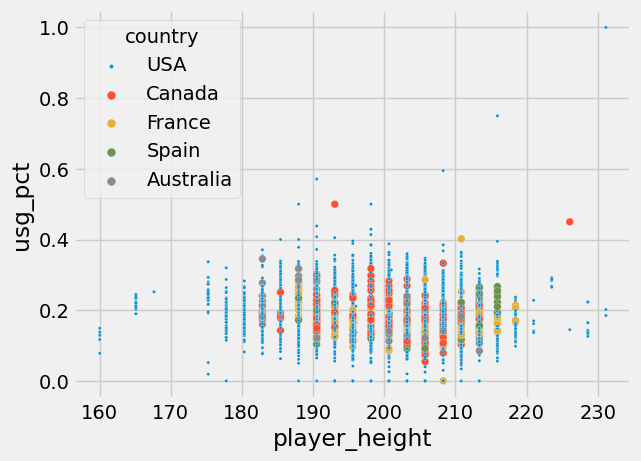

In [77]:
#Scatter plot comparing player's height vs usage percentage showing country info

_ = sns.scatterplot(x= 'player_height',y='usg_pct',data= country_group,hue = 'country',size = 'country',sizes = {'USA': 5,
                            'Canada': 30,
                            'France': 30,
                            'Spain':30,
                            'Australia':30} )

#See a few Spain 'big men' with higher usage percentages that might be contributing to overall inflation of values
#See some shorter, high usage Australian players; clustering of Canadians in the mean for both

Overall, there seem to be some possible trends that NBA players of different countries do have different attributes. Notably, Spanish players between 1996 - 2023 seem more distinct. Further exploration needs to be done to see how statistically significant these differences are. Also, further exploration can look at more countries and geographical trends of European countries vs. North America vs. Africa etc. 